### Classification
This classification is done by Muti-class Logisitic Regression using Softmax (not a neural network)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.process import get_data
from sklearn.utils import shuffle

In [25]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)

In [26]:
X

array([[ 1.        ,  0.13967078, -0.41895206, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.13967078, -0.70511924, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.81697841, -0.09656464, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , -0.81697841, -0.99773329, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  2.05296916, -0.07827538, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.13967078, -0.69724195, ...,  0.        ,
         0.        ,  1.        ]])

In [27]:
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 3, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 3,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 3,
       0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0,

In [28]:
def y2indicator(Yin) :
    N = len(Yin)
    K = np.max(Yin) + 1
    Yout = np.zeros((N, K))
    for n in range(N) :
        Yout[n, Yin[n]] = 1
    return Yout

def softmax(a) :
    aExp = np.exp(a)
    return aExp / aExp.sum(axis = 1, keepdims = True)

def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

def classification_rate (Y, T) :
    return np.mean(Y == T)

def cross_entropy(T, Y) :
    return - np.mean(T*np.log(Y))

def forward(X, W, b) :
    #X = (N X D)
    #W = (D X K)
    #b = (K)
    #forward = (N X K)
    return softmax(X.dot(W) + b)  

def predict(P_Y_given_X) :
    return np.argmax(P_Y_given_X, axis = 1)

0   0.35572477769608296   0.3671049859430887
1000   0.08553212004850044   0.10736200691095166
2000   0.08097411471599607   0.10173903045447986
3000   0.07910734611997547   0.10028243553422188
4000   0.0780774060351265   0.099972470223693
5000   0.07741466053759735   0.1000954856387724
6000   0.07694616934243517   0.10040844876968533
7000   0.07659388758796974   0.10080964889934324
8000   0.07631746565223095   0.10125059858547221
9000   0.07609383754863597   0.1017062118540134
Final train classification rate :  0.9225
Final test classification rate :  0.9


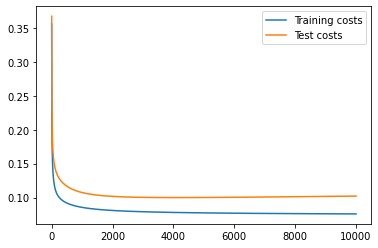

In [29]:
D = X.shape[1]
K = len(set(Y))  #assuming classes are numbered from 0 to k-1

Xtrain = X[:-100]
Xtest = X[-100:]

Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain)
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest)

W = np.random.randn(D, K) / np.sqrt(D * K)
b = np.random.randn(K) / np.sqrt(K)

train_costs = []
test_costs = []
learning_rate = 0.001
epochs = 10000

for i in range(epochs) :
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate* (Xtrain.T.dot(pYtrain - Ytrain_ind))
    b -= learning_rate* (pYtrain - Ytrain_ind).sum(axis = 0)
    
    if i % 1000 == 0:
        print(i, ' ', ctrain, ' ', ctest)
        
print('Final train classification rate : ', classification_rate(Ytrain, predict(pYtrain)))
print('Final test classification rate : ', classification_rate(Ytest, predict(pYtest)))

plt.plot(train_costs, label = 'Training costs')
plt.plot(test_costs, label = 'Test costs')
plt.legend()

In [30]:
Ytrain.dtype

dtype('int32')